In [1]:
import numpy as np
import redback
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from redback.transient_models.afterglow_models import tophat_redback, tophat, tophat_from_emulator

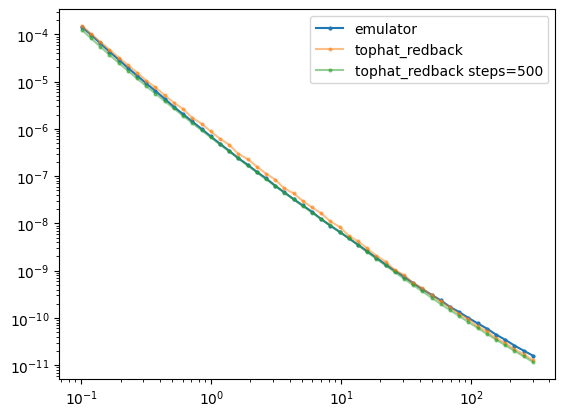

In [23]:
params={}
params['av'] = 0.5
params['loge0'] = 51.5
params['logn0'] = 1
params['p'] = 2.3
params['logepse'] = -1.25
params['logepsb'] = -2.5
params['g0'] = 1000
params['thv']= 0.02
params['thc'] = 0.08
params['base_model']='tophat_from_emulator'
params['frequency']=6e16
params['output_format']='flux_density'


#time= np.linspace(0.1,50,200)
time= np.logspace(3.94,7.41,50)/86400
flux1 = tophat_from_emulator(time, **params, axis='on', redshift=0.5)
#params['base_model']='tophat'
#flux2 = tophat(time, **params, redshift=0.01, ksin=1)
params['base_model']='tophat_redback'
flux3=  tophat_redback(time, **params, redshift=0.5, xiN=1)
params['steps']=1000
flux4=  tophat_redback(time, **params, redshift=0.5, xiN=1)

ax=plt.subplot()
ax.loglog(time,flux1, label='emulator',marker='o', markersize=2)
#ax.loglog(time,flux2, label='tophat', alpha=0.5,marker='o', markersize=2)
ax.loglog(time,flux3, label='tophat_redback', alpha=0.5,marker='o', markersize=2)
ax.loglog(time,flux4, label='tophat_redback steps=500', alpha=0.5,marker='o', markersize=2)
plt.legend()

#plt.ylim(10e-11,10e-3)
plt.show()

In [24]:
%%time
flux3=  tophat_redback(time, **params, redshift=0.01, xiN=1)

CPU times: user 8.42 s, sys: 157 ms, total: 8.57 s
Wall time: 9.27 s


In [25]:
%%time
flux2 = tophat(time, **params, redshift=0.01, ksin=1)

CPU times: user 7.35 ms, sys: 843 µs, total: 8.2 ms
Wall time: 7.96 ms


In [26]:
%%time
flux1 = tophat_from_emulator(time, **params, axis='on')

CPU times: user 61.9 ms, sys: 42.3 ms, total: 104 ms
Wall time: 26.6 ms
